In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
pd.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("power consumption.csv")
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [3]:
# Vamos verificar se a coluna de datas esta no formato datetime:
df.dtypes

DateTime                  object
Temperature              float64
Humidity                 float64
Wind Speed               float64
general diffuse flows    float64
diffuse flows            float64
Zone 1                   float64
Zone 2                   float64
Zone 3                   float64
dtype: object

In [4]:
# Vamos padronizar as datas e alterar o formato da coluna DateTime:
df['DateTime'] = df['DateTime'].str.replace(r'[/.]', '-', regex=True)
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.dtypes

DateTime                 datetime64[ns]
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Zone 1                          float64
Zone 2                          float64
Zone 3                          float64
dtype: object

* Os dados são do ano de 2017, desde janeiro até dezembro. Os registros são feitos a cada 10 minutos. 

In [5]:
# Vamos agrupar os dados por mês:
df_mensal = df.copy()

df_mensal.set_index('DateTime', inplace=True)
df_mensal = df_mensal.resample('M').sum()
df_mensal

/tmp/ipykernel_5897/2394933144.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensal = df_mensal.resample('M').sum()


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
DateTime,,,,,,,,
2017-01-31,56885.164,304864.96,3160.188,461324.919,306620.612,1.385291e+08,8.657680e+07,7.921857e+07
2017-02-28,50982.393,268334.93,4421.063,507100.368,369443.836,1.249346e+08,7.575238e+07,6.989473e+07
2017-03-31,65084.704,317390.53,4491.629,808390.034,419543.474,1.390767e+08,8.239623e+07,7.565447e+07
2017-04-30,71040.080,325047.69,968.840,688604.054,364188.117,1.346534e+08,7.617873e+07,8.032248e+07
2017-05-31,90590.470,306732.33,10259.483,1221646.470,549288.031,1.446158e+08,8.917861e+07,7.866059e+07
2017-06-30,95656.640,296539.48,6768.098,1208067.715,448221.285,1.494959e+08,8.929841e+07,8.826167e+07
2017-07-31,121437.250,256719.88,20671.076,1311706.409,335724.708,1.599521e+08,1.077962e+08,1.258585e+08
2017-08-31,114940.280,294852.96,20243.050,1017931.929,300874.460,1.626467e+08,1.100654e+08,1.100327e+08
2017-09-30,97795.240,288804.88,12727.628,869228.489,210072.405,1.442737e+08,8.717947e+07,6.446649e+07


In [6]:
# Vamos agrupar os dados por dias:
df_dias = df.copy()

df_dias.set_index('DateTime', inplace=True)
df_dias = df_dias.resample('D').sum()
df_dias

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1,Zone 2,Zone 3
DateTime,,,,,,,,
2017-01-01,1393.243,9866.78,45.381,17480.271,3743.125,4.098993e+06,2.554242e+06,2.573107e+06
2017-01-02,1796.670,10289.71,11.025,17338.246,3920.747,4.157207e+06,2.816312e+06,2.566190e+06
2017-01-03,1742.400,10797.36,11.047,17378.786,4114.751,4.400992e+06,2.888247e+06,2.537396e+06
2017-01-04,1513.365,10866.21,11.868,17706.142,4151.120,4.419336e+06,2.894699e+06,2.545012e+06
2017-01-05,1564.768,10229.83,12.081,17099.980,4282.767,4.435619e+06,2.884888e+06,2.543641e+06
...,...,...,...,...,...,...,...,...
2017-12-26,1673.545,9946.21,11.961,15384.483,7309.496,4.321941e+06,3.565009e+06,1.640978e+06
2017-12-27,2193.540,8560.21,11.812,13808.257,6005.529,4.315243e+06,3.608277e+06,1.655752e+06
2017-12-28,1967.380,9048.87,11.715,16217.303,4350.148,4.358449e+06,3.540276e+06,1.608052e+06


* As 'Zonas' indicadas no DataFrame são bairros de Tetouan, uma cidade no Marrocos. Vamos renomea-lás e renomear os nomes das demais colunas:

In [7]:
df = df.rename(columns={'Temperature': 'Temperatura', 'Humidity': 'Umidade', 'Wind Speed': 'Velocidade_Vento',
                        'general diffuse flows': 'fluxos_difusos_gerais', 'diffuse flows': 'fluxos_difusos',
                        'Zone 1': 'Bairro1', 'Zone 2  ': 'Bairro2', 'Zone 3  ': 'Bairro3'})
df.set_index('DateTime', inplace=True)
df

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


* Informações das colunas:

    1. Temperatura: Temperatura registrada naquele dia/mês/intervalo de tempo.
    2. Umidade: Umidade relativa do ar registrada naquele dia/mês/intervalo de tempo.
    3. Velocidade_Vento: Velocidade do vento naquele dia/mês/intervalo de tempo.
    4. fluxos_difusos_gerais: 
    5. fluxos_difusos: 
    6. Bairro1, Bairro2, Bairro3: Consumo de energia registrado naquele bairro naquele dia/mês/intervalo de tempo.

In [8]:
# Vamos fazer uma descrição dos dados:
df.describe().round(2)

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3
count,52416.00,52416.00,52416.00,52416.00,52416.00,52416.00,52416.00,52416.00
mean,18.81,68.26,1.96,182.70,75.03,32344.97,21042.51,17835.41
std,5.82,15.55,2.35,264.40,124.21,7130.56,5201.47,6622.17
min,3.25,11.34,0.05,0.00,0.01,13895.70,8560.08,5935.17
25%,14.41,58.31,0.08,0.06,0.12,26310.67,16980.77,13129.33
50%,18.78,69.86,0.09,5.04,4.46,32265.92,20823.17,16415.12
75%,22.89,81.40,4.92,319.60,101.00,37309.02,24713.72,21624.10
max,40.01,94.80,6.48,1163.00,936.00,52204.40,37408.86,47598.33


In [9]:
# Alguns dados de temperatura parecem estar com uma formatação um pouco diferente do restante. 
# Podemos perceber no inicio do nosso DataFrame que a temperatura é de 6.559 c°, o que pode querer significar 6.55 c°. 
# Vamos arrumar isso:

df['Temperatura'] = df['Temperatura'].round(2)
df 

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3
DateTime,,,,,,,,
2017-01-01 00:00:00,6.56,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.41,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.31,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.12,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.92,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
2017-12-30 23:10:00,7.01,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
2017-12-30 23:20:00,6.95,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
2017-12-30 23:30:00,6.90,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259


# Desafio 1:

In [10]:
import calendar

In [11]:
# Tratamento de dados:

#Renomeando colunas:
df_mensal = df_mensal.rename(columns={'Temperature': 'Temperatura','Humidity': 'Umidade', 'Wind Speed': 'Velocidade_Vento',
                        'general diffuse flows': 'fluxos_difusos_gerais', 'diffuse flows': 'fluxos_difusos',
                        'Zone 1': 'Bairro1', 'Zone 2  ': 'Bairro2', 'Zone 3  ': 'Bairro3'})

#Arredondando valores de consumo nos bairros:
df_mensal['Bairro1'] = df_mensal['Bairro1'].round(1)
df_mensal['Bairro2'] = df_mensal['Bairro2'].round(1)
df_mensal['Bairro3'] = df_mensal['Bairro3'].round(1)

#Os registros de temperatura foram todos somados, vamos tirar a média da temperatura do mês registrado:
df_mensal['dia_do_mes'] = df_mensal.index.to_series().dt.month.apply(lambda m: calendar.monthrange(df_mensal.index.year[0], m)[1])
df_mensal['Registros_Mes'] = df_mensal['dia_do_mes'] * 144
df_mensal['Temperatura'] = df_mensal['Temperatura'] / df_mensal['Registros_Mes']


df_mensal

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,dia_do_mes,Registros_Mes
DateTime,,,,,,,,,,
2017-01-31,12.743092,304864.96,3160.188,461324.919,306620.612,138529051.1,86576801.2,79218569.6,31,4464
2017-02-28,12.644443,268334.93,4421.063,507100.368,369443.836,124934558.6,75752381.8,69894728.7,28,4032
2017-03-31,14.579907,317390.53,4491.629,808390.034,419543.474,139076658.4,82396232.9,75654470.3,31,4464
2017-04-30,16.444463,325047.69,968.840,688604.054,364188.117,134653398.7,76178734.8,80322484.4,30,4320
2017-05-31,20.293564,306732.33,10259.483,1221646.470,549288.031,144615784.9,89178613.0,78660594.7,31,4464
2017-06-30,22.142741,296539.48,6768.098,1208067.715,448221.285,149495936.4,89298411.6,88261667.4,30,4320
2017-07-31,27.203685,256719.88,20671.076,1311706.409,335724.708,159952055.3,107796167.1,125858512.5,31,4464
2017-08-31,25.748271,294852.96,20243.050,1017931.929,300874.460,162646686.3,110065350.8,110032666.1,31,4464
2017-09-30,22.637787,288804.88,12727.628,869228.489,210072.405,144273663.7,87179467.4,64466490.7,30,4320


In [12]:
df_mensal['Temperatura'] = df_mensal['Temperatura'].round(2)
df_mensal

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,dia_do_mes,Registros_Mes
DateTime,,,,,,,,,,
2017-01-31,12.74,304864.96,3160.188,461324.919,306620.612,138529051.1,86576801.2,79218569.6,31,4464
2017-02-28,12.64,268334.93,4421.063,507100.368,369443.836,124934558.6,75752381.8,69894728.7,28,4032
2017-03-31,14.58,317390.53,4491.629,808390.034,419543.474,139076658.4,82396232.9,75654470.3,31,4464
2017-04-30,16.44,325047.69,968.840,688604.054,364188.117,134653398.7,76178734.8,80322484.4,30,4320
2017-05-31,20.29,306732.33,10259.483,1221646.470,549288.031,144615784.9,89178613.0,78660594.7,31,4464
2017-06-30,22.14,296539.48,6768.098,1208067.715,448221.285,149495936.4,89298411.6,88261667.4,30,4320
2017-07-31,27.20,256719.88,20671.076,1311706.409,335724.708,159952055.3,107796167.1,125858512.5,31,4464
2017-08-31,25.75,294852.96,20243.050,1017931.929,300874.460,162646686.3,110065350.8,110032666.1,31,4464
2017-09-30,22.64,288804.88,12727.628,869228.489,210072.405,144273663.7,87179467.4,64466490.7,30,4320


* Vamos repetir o mesmo processo para a Umidade:

In [13]:
df_mensal['Umidade'] = df_mensal['Umidade'] / df_mensal['Registros_Mes']
df_mensal

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,dia_do_mes,Registros_Mes
DateTime,,,,,,,,,,
2017-01-31,12.74,68.294122,3160.188,461324.919,306620.612,138529051.1,86576801.2,79218569.6,31,4464
2017-02-28,12.64,66.551322,4421.063,507100.368,369443.836,124934558.6,75752381.8,69894728.7,28,4032
2017-03-31,14.58,71.100029,4491.629,808390.034,419543.474,139076658.4,82396232.9,75654470.3,31,4464
2017-04-30,16.44,75.242521,968.840,688604.054,364188.117,134653398.7,76178734.8,80322484.4,30,4320
2017-05-31,20.29,68.712440,10259.483,1221646.470,549288.031,144615784.9,89178613.0,78660594.7,31,4464
2017-06-30,22.14,68.643398,6768.098,1208067.715,448221.285,149495936.4,89298411.6,88261667.4,30,4320
2017-07-31,27.20,57.508934,20671.076,1311706.409,335724.708,159952055.3,107796167.1,125858512.5,31,4464
2017-08-31,25.75,66.051290,20243.050,1017931.929,300874.460,162646686.3,110065350.8,110032666.1,31,4464
2017-09-30,22.64,66.852981,12727.628,869228.489,210072.405,144273663.7,87179467.4,64466490.7,30,4320


In [14]:
df_mensal['Umidade'] = df_mensal['Umidade'].round(2)
df_mensal

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,dia_do_mes,Registros_Mes
DateTime,,,,,,,,,,
2017-01-31,12.74,68.29,3160.188,461324.919,306620.612,138529051.1,86576801.2,79218569.6,31,4464
2017-02-28,12.64,66.55,4421.063,507100.368,369443.836,124934558.6,75752381.8,69894728.7,28,4032
2017-03-31,14.58,71.10,4491.629,808390.034,419543.474,139076658.4,82396232.9,75654470.3,31,4464
2017-04-30,16.44,75.24,968.840,688604.054,364188.117,134653398.7,76178734.8,80322484.4,30,4320
2017-05-31,20.29,68.71,10259.483,1221646.470,549288.031,144615784.9,89178613.0,78660594.7,31,4464
2017-06-30,22.14,68.64,6768.098,1208067.715,448221.285,149495936.4,89298411.6,88261667.4,30,4320
2017-07-31,27.20,57.51,20671.076,1311706.409,335724.708,159952055.3,107796167.1,125858512.5,31,4464
2017-08-31,25.75,66.05,20243.050,1017931.929,300874.460,162646686.3,110065350.8,110032666.1,31,4464
2017-09-30,22.64,66.85,12727.628,869228.489,210072.405,144273663.7,87179467.4,64466490.7,30,4320


* Vamos plotar um gráfico de visualização:

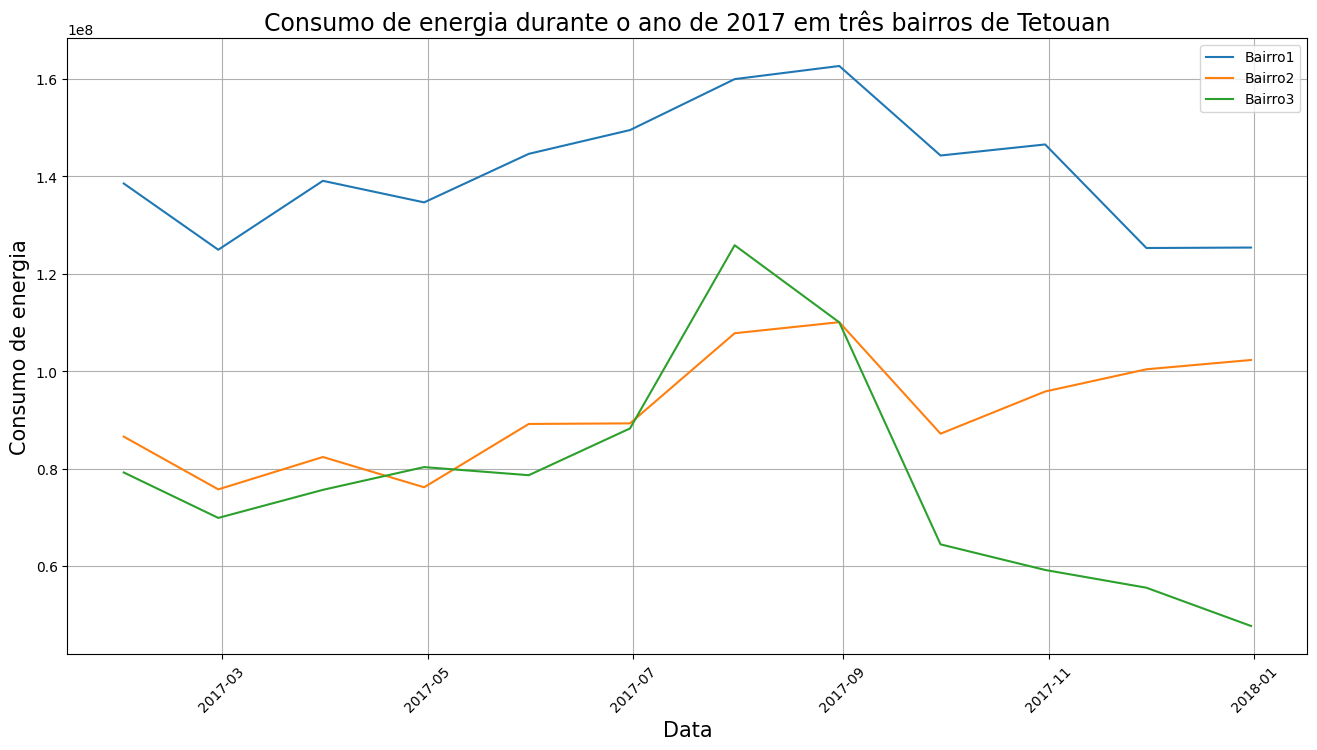

In [15]:
plt.figure(figsize=(16,8))
plt.plot(df_mensal.index, df_mensal['Bairro1'], label='Bairro 1')
plt.plot(df_mensal.index, df_mensal['Bairro2'], label='Bairro2')
plt.plot(df_mensal.index, df_mensal['Bairro3'], label='Bairro 3')

plt.title('Consumo de energia durante o ano de 2017 em três bairros de Tetouan', fontsize=17)
plt.xlabel('Data', fontsize=15)
plt.ylabel('Consumo de energia', fontsize=15)
plt.legend(['Bairro1', 'Bairro2', 'Bairro3'])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* Vamos tratar os dados de registros diarios:

In [16]:
#Renomeando colunas:
df_dias = df_dias.rename(columns={'Temperature': 'Temperatura','Humidity': 'Umidade', 'Wind Speed': 'Velocidade_Vento',
                        'general diffuse flows': 'fluxos_difusos_gerais', 'diffuse flows': 'fluxos_difusos',
                        'Zone 1': 'Bairro1', 'Zone 2  ': 'Bairro2', 'Zone 3  ': 'Bairro3'})

#Arredondando valores de consumo nos bairros:
df_dias['Bairro1'] = df_dias['Bairro1'].round(1)
df_dias['Bairro2'] = df_dias['Bairro2'].round(1)
df_dias['Bairro3'] = df_dias['Bairro3'].round(1)

# Criando uma coluna para os regsitros diarios:
df_dias['Registros_diarios'] = 144

df_dias['Temperatura'] = df_dias['Temperatura'] / df_dias['Registros_diarios']

df_dias['Temperatura'] = df_dias['Temperatura'].round(2)

df_dias

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,Registros_diarios
DateTime,,,,,,,,,
2017-01-01,9.68,9866.78,45.381,17480.271,3743.125,4098993.4,2554241.9,2573106.5,144
2017-01-02,12.48,10289.71,11.025,17338.246,3920.747,4157207.1,2816312.5,2566189.9,144
2017-01-03,12.10,10797.36,11.047,17378.786,4114.751,4400992.4,2888246.8,2537395.7,144
2017-01-04,10.51,10866.21,11.868,17706.142,4151.120,4419335.7,2894699.1,2545012.0,144
2017-01-05,10.87,10229.83,12.081,17099.980,4282.767,4435619.2,2884887.5,2543641.4,144
...,...,...,...,...,...,...,...,...,...
2017-12-26,11.62,9946.21,11.961,15384.483,7309.496,4321940.7,3565008.9,1640977.7,144
2017-12-27,15.23,8560.21,11.812,13808.257,6005.529,4315242.6,3608277.4,1655752.2,144
2017-12-28,13.66,9048.87,11.715,16217.303,4350.148,4358448.7,3540276.2,1608051.9,144


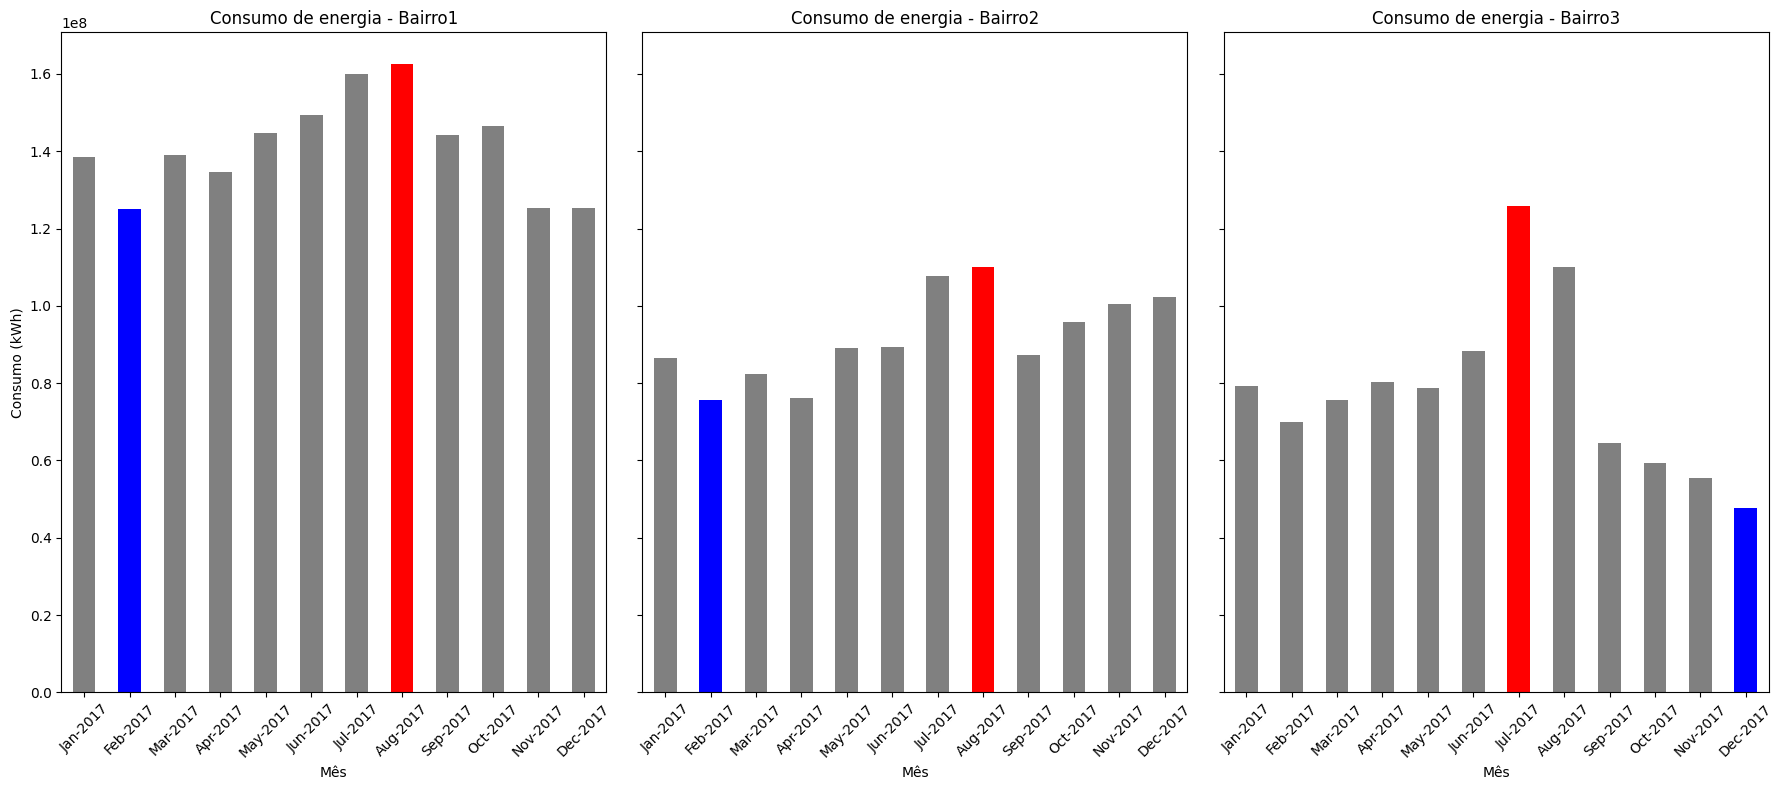

In [17]:
# Lista dos bairros:
bairros = ['Bairro1', 'Bairro2', 'Bairro3']

# Tamanho da figura:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8), sharey=True)

# Itera por cada bairro e criar um subplot:
for i, bairro in enumerate(bairros):
    ax = axes[i]

    # Identifica o mês com maior e menor demanda:
    max_val = df_mensal[bairro].max()
    min_val = df_mensal[bairro].min()

    # Destaque para os meses com maior e menor demanda:
    colors = ['red' if x == max_val else 'blue' if x == min_val else 'gray' for x in df_mensal[bairro]]

    # Plotando o gráfico de barras:
    df_mensal[bairro].plot(kind='bar', color=colors, ax=ax, legend=False)

    # Titulos e legendas:
    ax.set_title(f"Consumo de energia - {bairro}")
    ax.set_xlabel('Mês')
    ax.set_ylabel("Consumo (kWh)" if i == 0 else "")
    ax.set_xticks(range(len(df_mensal.index)))
    ax.set_xticklabels(df_mensal.index.strftime('%b-%Y'), rotation=45)

# Ajuste nos espaços entre os gráficos:
plt.tight_layout()
plt.show()

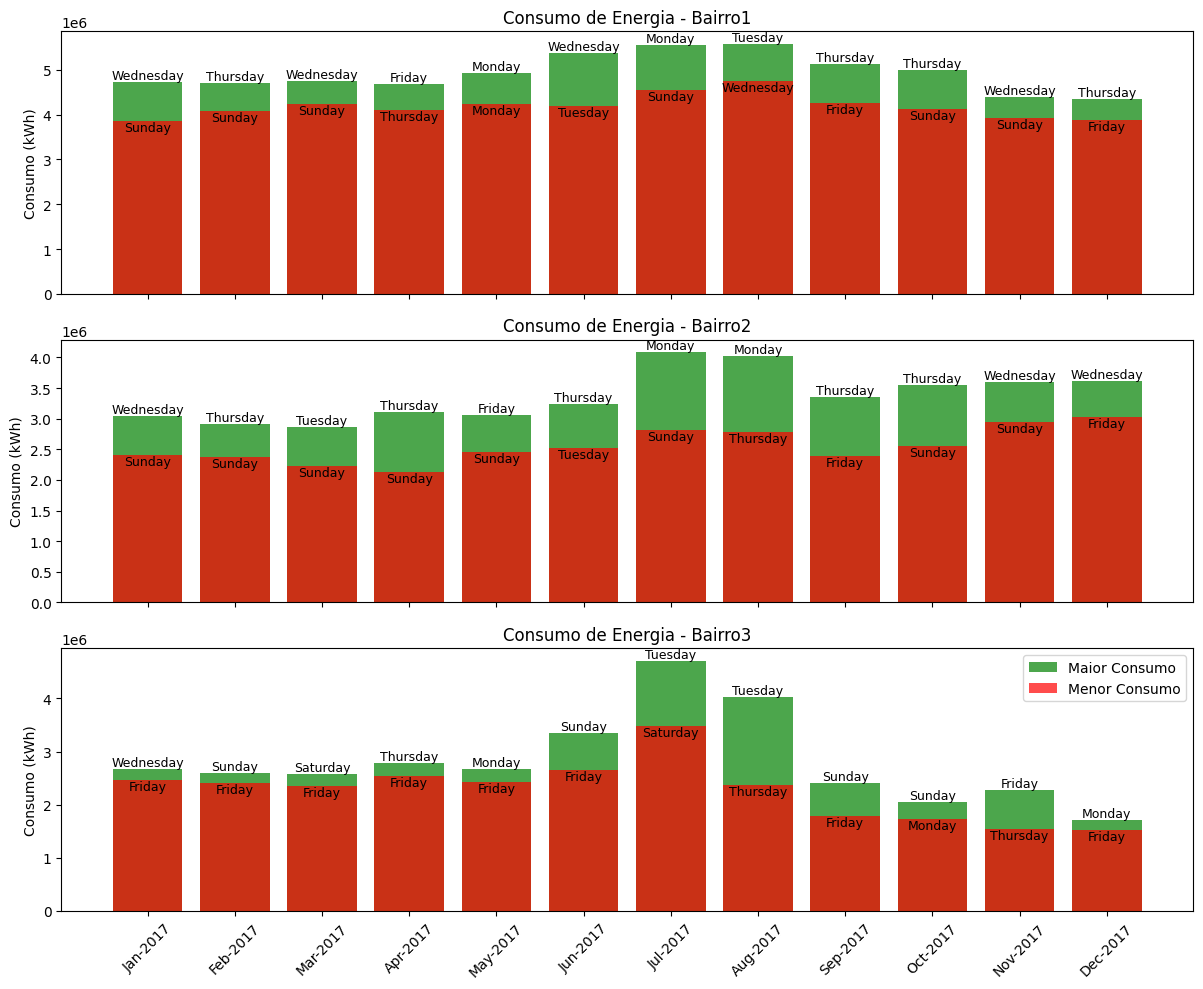

In [18]:
# Garantir que o índice de datas está no formato datetime
df_dias.index = pd.to_datetime(df_dias.index)

# Criar colunas auxiliares para ordenação
df_dias["Dia_da_Semana"] = df_dias.index.day_name()  # Nome do dia da semana
df_dias["Mês_Ano"] = df_dias.index.strftime('%b-%Y')  # Nome do mês para exibição
df_dias["Ordem_Mês_Ano"] = df_dias.index.to_period("M")  # Período para ordenação correta

# Criar a figura e os eixos
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
bairros = ["Bairro1", "Bairro2", "Bairro3"]
cores = {"max": "green", "min": "red"}

# Iterar sobre os bairros
for i, bairro in enumerate(bairros):
    ax = axes[i]  

    # Encontrar dias de maior e menor consumo
    maximos = df_dias.loc[df_dias.groupby("Mês_Ano")[bairro].idxmax(), ["Mês_Ano", "Dia_da_Semana", bairro]]
    minimos = df_dias.loc[df_dias.groupby("Mês_Ano")[bairro].idxmin(), ["Mês_Ano", "Dia_da_Semana", bairro]]

    # Adicionar coluna de ordenação
    maximos["Ordem_Mês_Ano"] = pd.to_datetime(maximos["Mês_Ano"], format='%b-%Y')
    minimos["Ordem_Mês_Ano"] = pd.to_datetime(minimos["Mês_Ano"], format='%b-%Y')

    # Renomear colunas
    maximos = maximos.rename(columns={"Dia_da_Semana": "Dia_Max", bairro: "Consumo_Max"})
    minimos = minimos.rename(columns={"Dia_da_Semana": "Dia_Min", bairro: "Consumo_Min"})

    # Criar DataFrame combinado e ordenar corretamente
    df_plot = pd.merge(maximos, minimos, on=["Mês_Ano", "Ordem_Mês_Ano"]).sort_values("Ordem_Mês_Ano")

    # Plotar os valores
    ax.bar(df_plot["Mês_Ano"], df_plot["Consumo_Max"], color=cores["max"], label="Maior Consumo", alpha=0.7)
    ax.bar(df_plot["Mês_Ano"], df_plot["Consumo_Min"], color=cores["min"], label="Menor Consumo", alpha=0.7)

    # Configuração do eixo
    ax.set_title(f"Consumo de Energia - {bairro}")
    ax.set_ylabel("Consumo (kWh)")

    # Exibir os dias nos rótulos das barras
    for j in range(len(df_plot)):
        ax.text(j, df_plot["Consumo_Max"].iloc[j], df_plot["Dia_Max"].iloc[j], ha='center', va='bottom', fontsize=9, color='black')
        ax.text(j, df_plot["Consumo_Min"].iloc[j], df_plot["Dia_Min"].iloc[j], ha='center', va='top', fontsize=9, color='black')

# Configuração do eixo X
axes[-1].set_xticks(range(len(df_plot["Mês_Ano"])))  
axes[-1].set_xticklabels(df_plot["Mês_Ano"], rotation=45)

# Legenda e layout
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df_mensal

,Temperatura,Umidade,Velocidade_Vento,fluxos_difusos_gerais,fluxos_difusos,Bairro1,Bairro2,Bairro3,dia_do_mes,Registros_Mes
DateTime,,,,,,,,,,
2017-01-31,12.74,68.29,3160.188,461324.919,306620.612,138529051.1,86576801.2,79218569.6,31,4464
2017-02-28,12.64,66.55,4421.063,507100.368,369443.836,124934558.6,75752381.8,69894728.7,28,4032
2017-03-31,14.58,71.10,4491.629,808390.034,419543.474,139076658.4,82396232.9,75654470.3,31,4464
2017-04-30,16.44,75.24,968.840,688604.054,364188.117,134653398.7,76178734.8,80322484.4,30,4320
2017-05-31,20.29,68.71,10259.483,1221646.470,549288.031,144615784.9,89178613.0,78660594.7,31,4464
2017-06-30,22.14,68.64,6768.098,1208067.715,448221.285,149495936.4,89298411.6,88261667.4,30,4320
2017-07-31,27.20,57.51,20671.076,1311706.409,335724.708,159952055.3,107796167.1,125858512.5,31,4464
2017-08-31,25.75,66.05,20243.050,1017931.929,300874.460,162646686.3,110065350.8,110032666.1,31,4464
2017-09-30,22.64,66.85,12727.628,869228.489,210072.405,144273663.7,87179467.4,64466490.7,30,4320


* Gráfico de evolução do consumo:

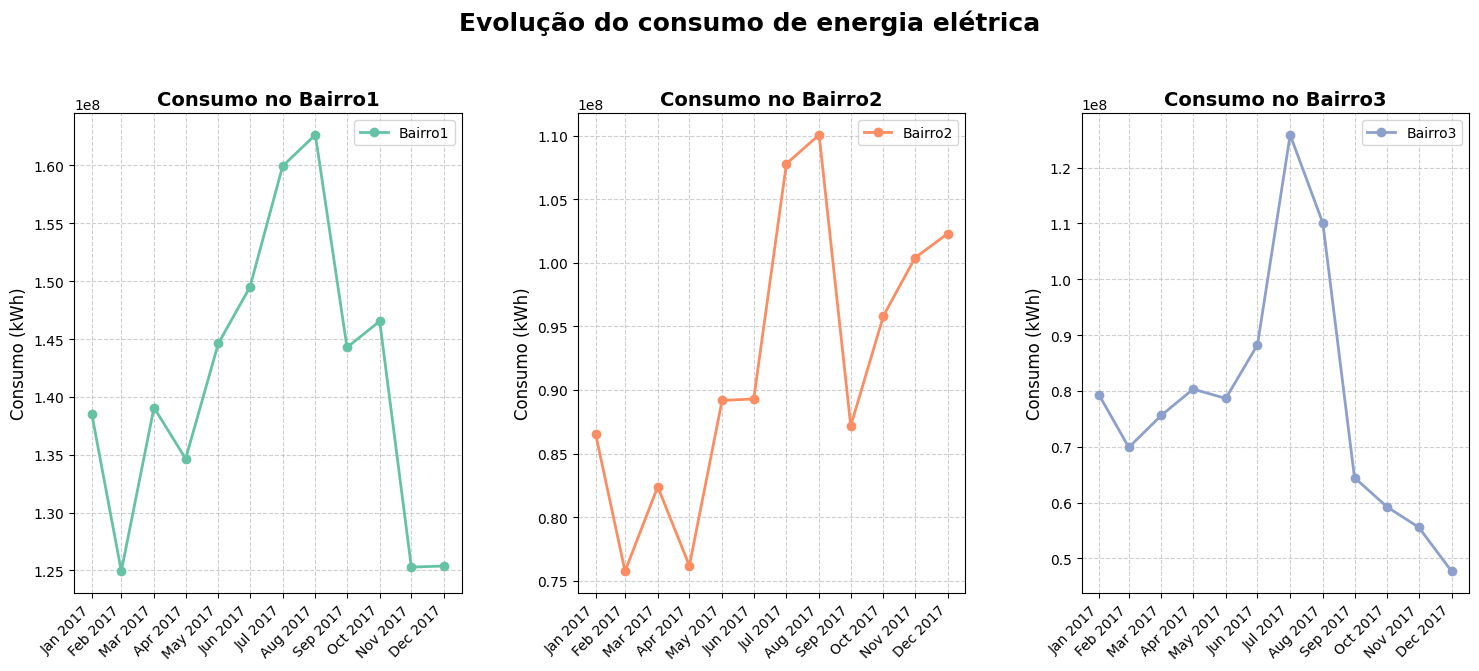

In [20]:
bairros = ['Bairro1', 'Bairro2', 'Bairro3']

# Tamanho da figura:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,8),sharex=True)
plt.suptitle('Evolução do consumo de energia elétrica', fontsize=18, fontweight='bold')

# Formatando as datas para exibir todos os meses no eixo X:
labels_formatadas = df_mensal.index.strftime('%b %Y')  
posicoes_x = range(len(df_mensal.index))  # Criando posições para cada rótulo no eixo X

# Iteração por cada bairro:
for i, bairro in enumerate(bairros):
    ax = axes[i]
    ax.plot(df_mensal.index, df_mensal[bairro], marker='o', linestyle='-', 
            markersize=6, linewidth=2, label=bairro, color=plt.cm.Set2(i))
    
    ax.set_title(f'Consumo no {bairro}', fontsize=14, fontweight='bold')
    ax.set_ylabel('Consumo (kWh)', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Ajustando o eixo X para mostrar todos os meses
    ax.set_xticks(df_mensal.index)
    ax.set_xticklabels(labels_formatadas, rotation=45, ha='right', fontsize=10)

# Ajustando espaçamento entre gráficos
plt.subplots_adjust(top=0.85, bottom=0.25, wspace=0.3)

plt.show()
    

# Desafio 2:

In [28]:
df_mensal[['Bairro1', 'Bairro2', 'Bairro3']].describe().round(1)

,Bairro1,Bairro2,Bairro3
count,12.0,12.0,12.0
mean,141282831.4,91913679.7,77905054.4
std,12621605.2,11448287.5,22273044.1
min,124934558.6,75752381.8,47713561.6
25%,132336150.9,85531659.1,63152598.2
50%,141675161.0,89238512.3,77157532.5
75%,147280990.0,100875504.4,82307280.2
max,162646686.3,110065350.8,125858512.5


In [32]:
df_mensal['Velocidade_Vento'] = df_mensal['Velocidade_Vento'] / df_mensal['Registros_Mes']
df_mensal['Velocidade_Vento'] = df_mensal['Velocidade_Vento'].round(1)

In [33]:
Matriz_Correlacao = df_mensal[['Temperatura', 'Umidade', 'Velocidade_Vento']].corr()
Matriz_Correlacao

,Temperatura,Umidade,Velocidade_Vento
Temperatura,1.000000,-0.494717,0.907142
Umidade,-0.494717,1.000000,-0.641134
Velocidade_Vento,0.907142,-0.641134,1.000000


In [30]:
import seaborn as sns

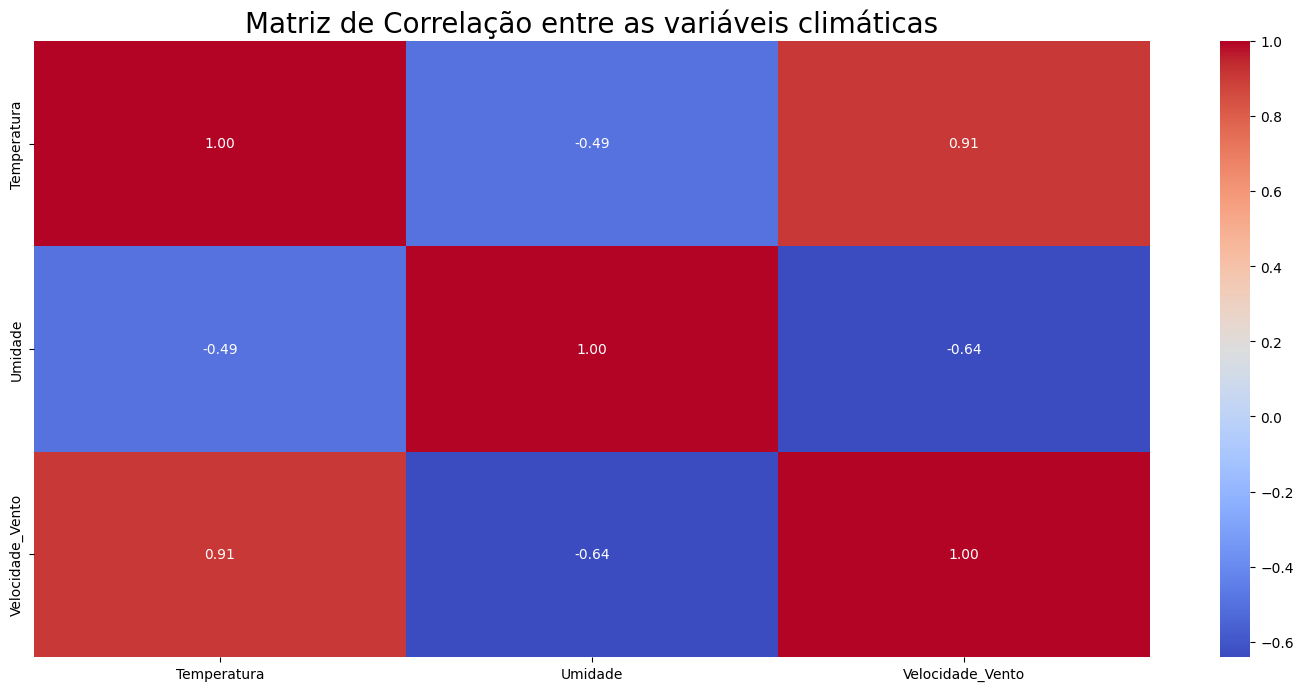

In [34]:
plt.figure(figsize=(18,8))
sns.heatmap(Matriz_Correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as variáveis climáticas', fontsize=20)
plt.show()

# Desafio 3:

* Vamos calcular a média móvel do consumo mensal de energia elétrica nos bairros:

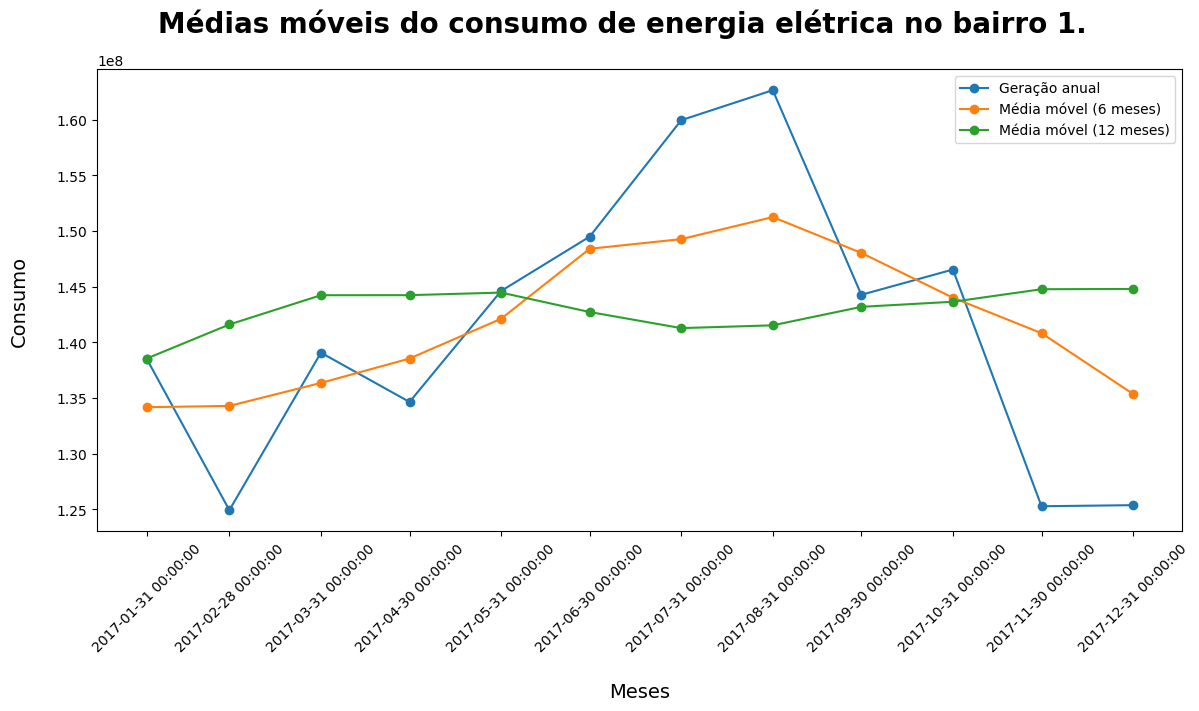

In [40]:
df_bairro1 = df_mensal[['Bairro1']]

media_movel_6m = df_bairro1.rolling(window=6, center=True, min_periods=1).mean()
media_movel_12m = df_bairro1.rolling(window=12, center=True, min_periods=1).mean()

fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle("Médias móveis do consumo de energia elétrica no bairro 1.", fontsize=20, weight='semibold')

ax.plot(df_bairro1.index, df_bairro1, label='Geração anual', marker='o')
ax.plot(df_bairro1.index, media_movel_6m, label='Média móvel (6 meses)', marker='o')
ax.plot(df_bairro1.index, media_movel_12m, label='Média móvel (12 meses)', marker='o')

# Adicionar todos os anos no eixo X
ax.set_xticks(df_bairro1.index)  # Assumindo que o índice do DataFrame contém os anos
ax.set_xticklabels(df_bairro1.index, rotation=45)  # Gira os anos para melhor visualização

ax.set_xlabel('Meses', fontsize=14, labelpad=20)
ax.set_ylabel('Consumo', fontsize=14, labelpad=20)

ax.legend()
plt.show()


In [38]:
df_bairro1

,Bairro1
DateTime,
2017-01-31,138529051.1
2017-02-28,124934558.6
2017-03-31,139076658.4
2017-04-30,134653398.7
2017-05-31,144615784.9
2017-06-30,149495936.4
2017-07-31,159952055.3
2017-08-31,162646686.3
2017-09-30,144273663.7
